# Ejercicio 7

Re-implemente el modelo del ejercicio 4 (Balance.csv) utilizando un Multiperceptrón con Tensorflow/Keras.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

DATA_PATH="./Data/"

data=pd.read_csv(DATA_PATH+'Balance.csv')

X = data.drop('Balance', axis=1)
T = data['Balance']

binarizer = preprocessing.LabelBinarizer()
T = binarizer.fit_transform(T)

X=np.array(X)
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.2, random_state=42, stratify=T)


In [3]:
import tensorflow as tf

# Verifica si hay GPUs disponibles y configura para usar CUDA si es posible
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Configura TensorFlow para que use solo la memoria necesaria en la GPU
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    print("TensorFlow está configurado para usar CUDA (GPU).")
  except RuntimeError as e:
    print(e)
else:
  print("No se detectaron GPUs. TensorFlow usará la CPU.")

Physical devices cannot be modified after being initialized


In [ ]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Input, Dense

model=Sequential([
  Input(shape=[4]),
  Dense(8, activation='tanh'),
  Dense(3, activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# display(model.summary())

Training accuracy (último epoch): 0.9959999918937683
Validation accuracy (último epoch): 0.9520000219345093
Test loss: 0.1200 - Test accuracy: 0.9520


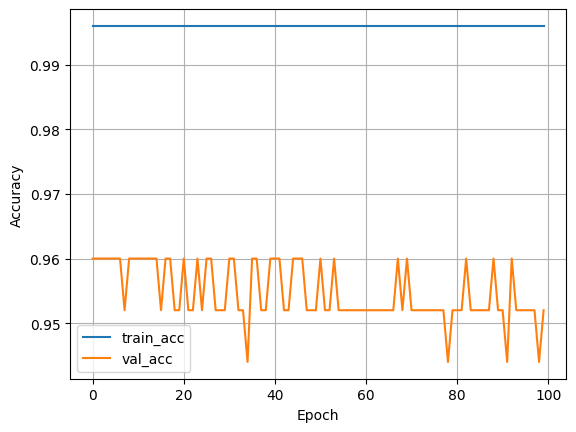

In [13]:
# Entrena y guarda el history (añade validation para ver val_accuracy)
history = model.fit(X_train, T_train, epochs=100, batch_size=20, validation_data=(X_test, T_test), verbose=0)

# Accuracy del último epoch
print("Training accuracy (último epoch):", history.history['accuracy'][-1])
if 'val_accuracy' in history.history:
  print("Validation accuracy (último epoch):", history.history['val_accuracy'][-1])

# Evaluación final en el test set
loss, acc = model.evaluate(X_test, T_test, verbose=0)
print(f"Test loss: {loss:.4f} - Test accuracy: {acc:.4f}")

# Graficar curva de accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train_acc')
if 'val_accuracy' in history.history:
  plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()